# Project for Data Science Fundamentals course
Loay Abdulatif & Sharef Mustafa

# The Question that we are investigating is that:
# Who are the attackers of a website

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

The data sets that we will work on are logs from the firewall, we will use the small file pdata.csv to simplify readings and then we will use the huge file projectdata.csv which contains logs on source IP addresses , timestamp, http event ..etc
for the period from Feb 1st 2017 till Feb 28 2016 

In [90]:
df = pd.read_csv('pdata.csv')

print(df.columns.values)

print('\nNumber of hits on the website is %s hit' %len(df['Source IP']))

['Event Name' 'Log Source' 'Event Count' 'Time' 'Low Level Category'
 'Source IP' 'Source Port' 'Destination IP' 'Destination Port' 'Username'
 'Magnitude']

Number of hits on the website is 118359 hit


we will start by using bar plot to visualise IP addresses Vs their hit count, however due to the huge size we will select samples with hit number > 100


 Size of filtered hits is 34 hits


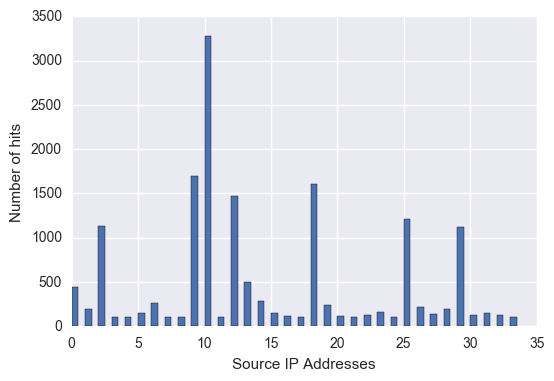

In [91]:
total_hits = Counter(df['Source IP'])

# filterout IP addresses with hit count > 100 hit
hits = {k:v for k,v in total_hits.items() if(v > 100)}

print('\n Size of filtered hits is %s hits' %len(hits))

# x contains the IP addresses
sourceIPs = hits.keys()

# y contains the number of hits per that IP
num_hits = hits.values()

# indexes will facilitate in drawing as index of IP addresses
indexes = np.arange(len(hits))

plt.bar(indexes, num_hits,width=0.5)
plt.xlabel("Source IP Addresses")
plt.ylabel("Number of hits")
plt.show()


As shown in the bar chart above few samples have extream values , we have to investigate them deeper

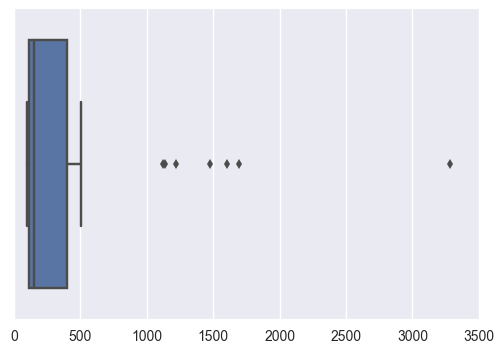

In [92]:
sns.boxplot(pd.Series(hits))

The box plot above shows the outliars outside of the box, also it shows the box and the variance are closer to the 1st quartile which indicates that we should use a hit count of 700 instead of 100 in order to isolate the outliars

C:\Users\Shareef\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



 Size of filtered hits is 455 hits


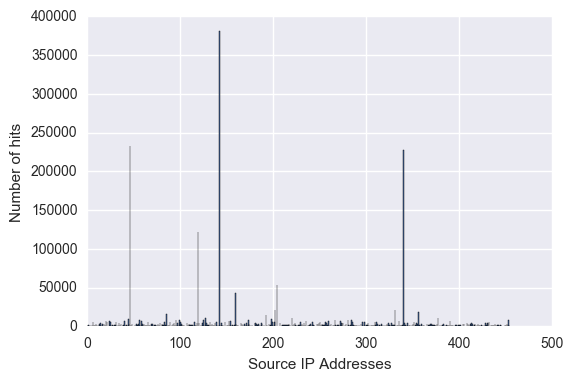

In [93]:
full_df = pd.read_csv('projectdata.csv')
total_hits = Counter(full_df['Source IP'])

# filterout IP addresses with hit count > 700 hit
hits = {k:v for k,v in total_hits.items() if(v > 700)}

print('\n Size of filtered hits is %s hits' %len(hits))

# x contains the IP addresses
#sourceIPs = hits.keys()

# y contains the number of hits per that IP
num_hits = hits.values()

# indexes will facilitate in drawing as index of IP addresses
indexes = np.arange(len(hits))

plt.bar(indexes, num_hits,width=0.5)
plt.xlabel("Source IP Addresses")
plt.ylabel("Number of hits")
plt.show()


As shown in the bar chart above there are 455 source IP address with hit count over 700, also there few outliars with even more than 10000 hits

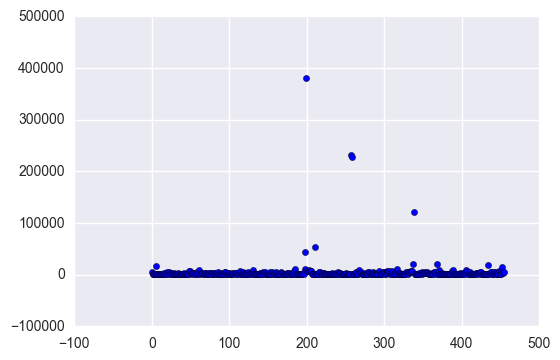

In [94]:
plt.scatter(indexes,pd.Series(hits))

the scatter plot above shows the top suspected attackers, as we can see there are 

In [101]:
num_of_IPs = len(hits)
suspects = {k:v for k,v in hits.items() if(v > 10000)}
print('There are %s attacker out of %s suspected IPs\n' %(len(suspects), len(hits)))
suspects

There are 14 attacker out of 455 suspected IPs



{'148.251.123.200': 15777,
 '212.14.228.126': 10153,
 '213.244.116.220': 43519,
 '213.244.116.250': 10623,
 '213.244.116.31': 381110,
 '213.244.66.130': 52999,
 '217.66.226.251': 232057,
 '217.66.226.252': 227828,
 '5.133.27.32': 10601,
 '66.249.93.31': 20714,
 '66.249.93.85': 121569,
 '82.213.33.189': 21254,
 '85.114.97.181': 17883,
 '95.130.88.140': 14186}

The above IPs are suspected attackers that need to be added to special security policy